## Machine Learning with Wine Quality comparing using multiple Support Vector Machine kernel

### Import key packages and load data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# Libraries needed for data Analysis 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Libraries needed for model and visualization
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score
import matplotlib.pyplot as plt # plots 
import seaborn as sns
#%matplotlib inline # will make your plot outputs appear and be stored within the notebook.

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Load in the red wine data from kaggle.
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv',sep=',')

# Review data
print(df.head(10))
# Data dimensionality (rows, colums)
print(df.shape)
# Data distributing
df.info()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

### Check the nulls

In [2]:
print('Total Null values in the dataset : ',df.isna().sum().sum())

Total Null values in the dataset :  0


### Check the dupes

In [3]:
print('Total duplicate values in the dataset : ',df.duplicated().sum())

Total duplicate values in the dataset :  240


### Remove dupes

In [4]:
df = df.drop(df[df.duplicated()].index,axis = 0).reset_index(drop = True)
print('Duplicate values now : ',df.duplicated().sum())

Duplicate values now :  0


In [5]:
# import warnings filter -- This needs to be 
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Explore data with stats

In [6]:

# Statistical characteristics of each numerical feature
print(df.describe())
print(df[df['quality'] == 8].mean())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000         

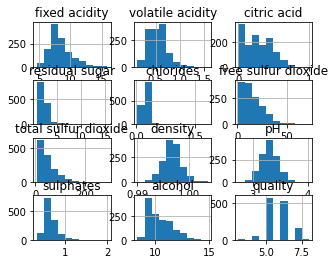

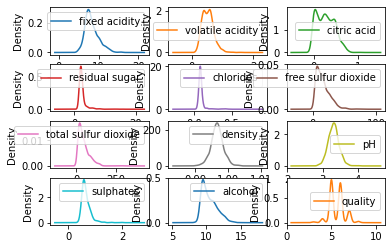

In [7]:
# Histograms
df.hist(bins=10,figsize=(5, 4))
plt.show()
# Density
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

### Pivot table in pandas is an excellent function to summarize one or more numeric variable based on two other categorical variables 


In [8]:
# Create pivot_table
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df_pivot_table = df.pivot_table(colum_names,index=
               ['quality'], aggfunc=  'median')
print(df_pivot_table)

         alcohol  chlorides  citric acid   density  fixed acidity  \
quality                                                             
3          9.925     0.0905        0.035  0.997565            7.5   
4         10.000     0.0800        0.090  0.996500            7.5   
5          9.600     0.0820        0.230  0.997000            7.8   
6         10.500     0.0780        0.270  0.996520            7.9   
7         11.600     0.0720        0.400  0.995770            8.8   
8         12.500     0.0710        0.390  0.994720            7.9   

         free sulfur dioxide    pH  residual sugar  sulphates  \
quality                                                         
3                        6.0  3.39             2.1      0.545   
4                       11.0  3.37             2.1      0.560   
5                       15.0  3.30             2.2      0.580   
6                       14.0  3.32             2.2      0.640   
7                       11.0  3.28             2.3      0

# Co-relation
The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation.


In [9]:
corr_matrix = df.corr()
print(corr_matrix["quality"].sort_values(ascending=False))



quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64


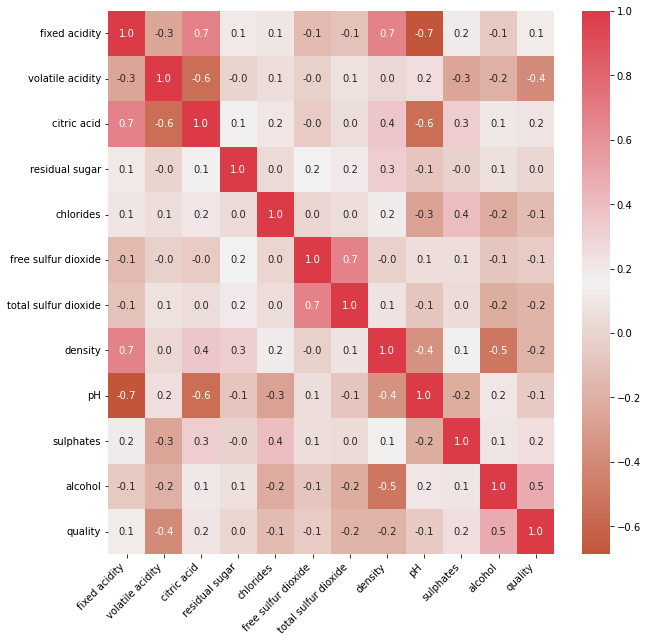

In [10]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
# Correlation matrix
correlations = df.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
colormap = sns.diverging_palette(20, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".1f")
ax.set_xticklabels(
    colum_names,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(colum_names);
plt.show()

## Data Pre-processing 

In [11]:
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
5,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
6,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
7,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
8,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,bad


#### Labeling quality variable  0,1 / good, bad 

In [12]:
label_quality = LabelEncoder()
# Bad becomes 0 and good becomes 1
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

#### Data Splitting and Validation

In [13]:

# split the data in 90:10 or 80:20 or 95:5 based on need.

X = df.drop('quality', axis=1)
y = df['quality']

# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=42)

# Applying Standard scaling to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(1223, 11)
(1223,)
(136, 11)
(136,)


(None, None)

#### Configuration for cross validation 

SupportVectorClassifier: 0.875816 (0.034378)
RandomForestClassifier: 0.867633 (0.030926)
DecisionTreeClassifier: 0.824304 (0.054010)
AdaBoostClassifier: 0.854545 (0.036319)
KNeighborsClassifier: 0.861049 (0.025023)
GaussianNB: 0.835652 (0.045381)
LogisticRegression: 0.868459 (0.033727)


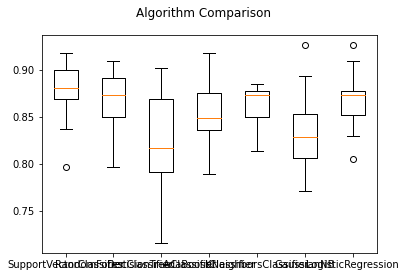

In [14]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('LogisticRegression', LogisticRegression()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
   kfold = KFold(n_splits=10,shuffle=True, random_state=seed)
   cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
def svc_param_selection(X, y, nfolds):
    param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
    svc = SVC()
    grid_search = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=nfolds)
    grid_search.fit(X,  y)
    return grid_search.best_params_
print(svc_param_selection(X_train, y_train,10))

{'C': 1.4, 'gamma': 0.1, 'kernel': 'rbf'}


In [16]:
svc = SVC(C = 1.4, gamma =  0.1, kernel= 'rbf')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc))
print('Classification report')


print(classification_report(y_test, pred_svc))
print('Accuracy score',round(accuracy_score(y_test, pred_svc) * 100, 2))

Confusion matrix
[[123   5]
 [  4   4]]
Classification report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       128
           1       0.44      0.50      0.47         8

    accuracy                           0.93       136
   macro avg       0.71      0.73      0.72       136
weighted avg       0.94      0.93      0.94       136

Accuracy score 93.38


In [17]:
ada_classifier = AdaBoostClassifier(n_estimators=250)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

# Cross-validation
scores = cross_val_score(ada_classifier,X_test,y_test, cv=12)
print('Accuracy score',round(scores.mean() * 100,2))

Accuracy score 94.95


In [18]:
svm_classifier = SVC(kernel= 'poly')
svm_classifier.fit(X_train, y_train)
pred_svm = svm_classifier.predict(X_test)

# Cross-validation
scores = cross_val_score(svm_classifier,X_test,y_test, cv=15)
print('Accuracy score',round(scores.mean() * 100,2))

Accuracy score 94.89


In [19]:
svm_linear = SVC(kernel= 'linear')
svm_linear.fit(X_train, y_train)
pred_svm_linear = svm_linear.predict(X_test)

# Cross-validation
scores = cross_val_score(svm_linear,X_test,y_test, cv=15)
print('Accuracy score',round(scores.mean() * 100,2))

Accuracy score 92.67


In [20]:
svm_rbf = SVC(kernel= 'rbf')
svm_rbf.fit(X_train, y_train)
pred_svm_rbf = svm_rbf.predict(X_test)

# Cross-validation
scores = cross_val_score(svm_rbf,X_test,y_test, cv=15)
print('Accuracy score',round(scores.mean() * 100,2))

Accuracy score 94.15
